In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer , LancasterStemmer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve,auc

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [3]:
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding="ISO-8859-1")

print('Data :',data)
print('Data Shape :',data.shape)
print('Data columns :',data.columns)

Data :         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN       

In [4]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
data.columns

Index(['v1', 'v2'], dtype='object')

In [5]:
data = data.rename(columns={'v2': 'messages', 'v1': 'label'})
data.head(5)

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
ham=data[data['label'].isin(['ham'])]
spam=data[data['label'].isin(['spam'])]
print('Positive',ham)
print('*******************************************************')
print('Negative',spam)

Positive      label                                           messages
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
6      ham  Even my brother is not like to speak with me. ...
...    ...                                                ...
5565   ham                                       Huh y lei...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[4825 rows x 2 columns]
*******************************************************
Negative      label                                           messages
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
5     spam  FreeMsg Hey there dar

In [7]:
ham=data[data['label'].isin(['ham'])]
spam=data[data['label'].isin(['spam'])]
print('Positive',ham)
print('*******************************************************')
print('Negative',spam)

Positive      label                                           messages
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
6      ham  Even my brother is not like to speak with me. ...
...    ...                                                ...
5565   ham                                       Huh y lei...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[4825 rows x 2 columns]
*******************************************************
Negative      label                                           messages
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
5     spam  FreeMsg Hey there dar

Number of hum 4825
Number of spam 747


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


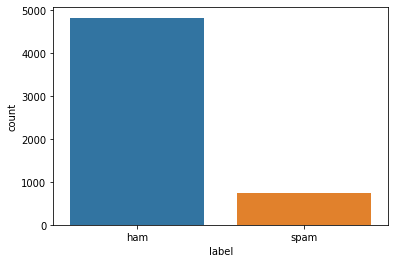

In [8]:
n=data.label
hum ,spam = n.value_counts()
print('Number of hum',hum)
print('Number of spam',spam)
ax=sns.countplot(n,data = data,label='Count')

In [9]:
data.isnull().sum()

label       0
messages    0
dtype: int64

In [10]:
data.duplicated().sum()

403

In [11]:
#remove all duplicate rows
data.drop_duplicates(inplace=True)

In [12]:
#reset index
data.reset_index(inplace=True)

In [13]:
#remove old index column
data.drop("index",axis=1,inplace=True)

In [14]:
print(stopwords.words('english'))
print(len(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
def clean_text(text):
  STOPWORDS = set(stopwords.words('english'))
  text = text.lower()
  text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
  text = word_tokenize(text)
  # remove extra spaces
  text = " ".join(word for word in text if word not in STOPWORDS)
  return text

In [16]:
# clean the messages
data['messages'] = data['messages'].apply(clean_text)

In [17]:
data['messages'][2]

'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18'

In [18]:
stemmer = PorterStemmer()
def stemSentence(text):
    token_words=word_tokenize(text)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(stemmer.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [19]:
# clean the messages
data['messages'] = data['messages'].apply(stemSentence)

In [20]:
data['messages'][2]

'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18 '

In [21]:
# label encoding of target column
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

In [22]:
data

,label,messages
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though
...,...,...
5164,1,2nd time tri 2 contact u u 750 pound prize 2 c...
5165,0,b go esplanad fr home
5166,0,piti mood suggest
5167,0,guy bitch act like interest buy someth els nex...


In [23]:
X = data['messages']
y = data['label']

In [24]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(X)

In [25]:
print(vectors.shape)
print(y.shape)

(5169, 7159)
(5169,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(vectors,y,test_size = 0.3,random_state=22)
print('X_Train')
print(X_train[:3,:])
print('****************************')
print('X_test')
print(X_test[:3,:])
print(X_test.shape)
print('****************************')
print('Y_train')
print(y_train[:3,])
print('****************************')
print('Y_test')
print(y_test[:3,])

X_Train
  (0, 1962)	0.6018111977335596
  (0, 5248)	0.3844810847663267
  (0, 2006)	0.37540845009023915
  (0, 7005)	0.3253459223939063
  (0, 4168)	0.3265173968154751
  (0, 4483)	0.3695977457977195
  (1, 3614)	0.6364232290053494
  (1, 6855)	0.545766007239593
  (1, 3971)	0.34545272943311967
  (1, 2413)	0.42162465612362504
  (2, 6115)	0.29060888423736003
  (2, 959)	0.2730449716508939
  (2, 7106)	0.26147591818756377
  (2, 6481)	0.21381042952567383
  (2, 459)	0.2667761399064151
  (2, 2918)	0.2528348781835376
  (2, 5192)	0.2006977231253781
  (2, 5526)	0.28071740162929265
  (2, 4089)	0.28071740162929265
  (2, 4328)	0.21506087212971509
  (2, 936)	0.21506087212971509
  (2, 4353)	0.1680380822186428
  (2, 7066)	0.22900213385259263
  (2, 3440)	0.17947763126500488
  (2, 1249)	0.17644820542419853
  (2, 5517)	0.2177070530106053
  (2, 6354)	0.22714311992689482
  (2, 2753)	0.19600179432563225
  (2, 6824)	0.14140333175605288
****************************
X_test
  (0, 3652)	0.5861557620108255
  (0, 1530)	0.

In [27]:
lg=LogisticRegression(C=3,random_state=22)
CrossValidateValues = cross_validate(lg,X_train,y_train,cv=6,return_train_score = True)
# Showing Results
print('Train Score Value : ', CrossValidateValues['train_score'])
print('Test Score Value : ', CrossValidateValues['test_score'])
print('-----------------------------------------------------------------------------------')

# Showing Results
score_train = cross_val_score(estimator = lg, X = X_train, y = y_train, cv = 6)
print("Cross validation Score is",np.mean(score_train)*100)

Train Score Value :  [0.98441128 0.98474295 0.98474295 0.98573798 0.98507463 0.98308458]
Test Score Value :  [0.96185738 0.95522388 0.97180763 0.960199   0.96351575 0.960199  ]
-----------------------------------------------------------------------------------
Cross validation Score is 96.21337755666114


In [28]:
lg.fit(X_train,y_train)

LogisticRegression(C=3, random_state=22)

In [29]:
y_pred_LR=lg.predict(X_test)
print('Y Test   : ',y_test[:5,].ravel())
print('Y Predict :',y_pred_LR[:5])

Y Test   :  [0 0 0 0 1]
Y Predict : [0 0 0 0 0]


In [30]:
accuracy_lg=accuracy_score(y_test,y_pred_LR)
print(accuracy_lg)

0.968407479045777


[[1352    5]
 [  44  150]]


<function matplotlib.pyplot.show(close=None, block=None)>

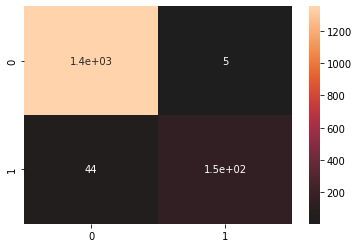

In [31]:
cm=confusion_matrix(y_test,y_pred_LR)
print(cm)
sns.heatmap(cm,center=True,annot=True)
plt.show

In [32]:
cr=classification_report(y_test,y_pred_LR)
print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1357
           1       0.97      0.77      0.86       194

    accuracy                           0.97      1551
   macro avg       0.97      0.88      0.92      1551
weighted avg       0.97      0.97      0.97      1551



LR_tpr:  [0.        0.0036846 1.       ]
LR_fpr:  [0.         0.77319588 1.        ]
threshold:  [2 1 0]


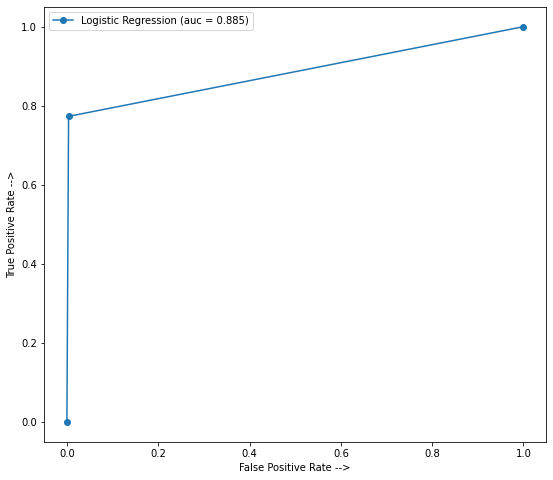

In [33]:
LR_tpr,LR_fpr,threshold=roc_curve(y_test,y_pred_LR)
LR_auc = auc(LR_tpr, LR_fpr)
print('LR_tpr: ',LR_tpr)
print('LR_fpr: ',LR_fpr)
print('threshold: ',threshold)

#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 8))
plt.plot(LR_tpr, LR_fpr, marker='o', label='Logistic Regression (auc = %0.3f)' % LR_auc)
plt.ylabel('True Positive Rate -->')
plt.xlabel('False Positive Rate -->')

plt.legend()

plt.show()

In [34]:
s_v_c = SVC(C = 3, kernel='rbf' , random_state=22)
CrossValidateValues_svc = cross_validate(s_v_c,X_train,y_train,cv=8,return_train_score = True)

# Showing Results
print('train Score Value : ', CrossValidateValues_svc['train_score'])
print('Test Score Value : ', CrossValidateValues_svc['test_score'])
#print('//////////////////////////////////////')

# Showing Results
score2_train = cross_val_score(estimator = s_v_c, X = X_train, y = y_train, cv = 8)
print("Cross validation is",np.mean(score2_train)*100)

train Score Value :  [1. 1. 1. 1. 1. 1. 1. 1.]
Test Score Value :  [0.97130243 0.98013245 0.96238938 0.97787611 0.97566372 0.97123894
 0.96681416 0.96902655]
Cross validation is 97.18054660180898


In [35]:
s_v_c.fit(X_train,y_train)


SVC(C=3, random_state=22)

In [36]:
y_pred_svc=s_v_c.predict(X_test)
print('Y Test: ',y_test[:5,])
print('Y Predict: ,',y_pred_svc[:5,])

Y Test:  2186    0
4217    0
2059    0
2611    0
1812    1
Name: label, dtype: int64
Y Predict: , [0 0 0 0 0]


In [37]:
accuracy_s=accuracy_score(y_test,y_pred_svc)
print(accuracy_s)

0.9761444229529336


[[1354    3]
 [  34  160]]


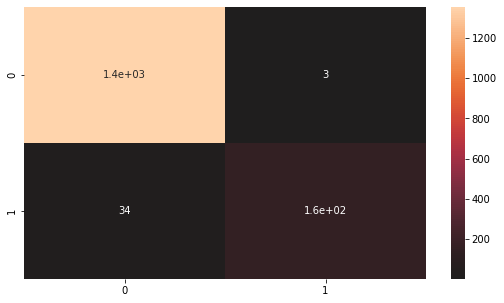

In [38]:
cm=confusion_matrix(y_test,y_pred_svc)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)
plt.show()

In [39]:
cr=classification_report(y_test,y_pred_svc)
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1357
           1       0.98      0.82      0.90       194

    accuracy                           0.98      1551
   macro avg       0.98      0.91      0.94      1551
weighted avg       0.98      0.98      0.98      1551



svm_tpr [0.         0.00221076 1.        ]
svm_fpr [0.         0.82474227 1.        ]
threshold [2 1 0]


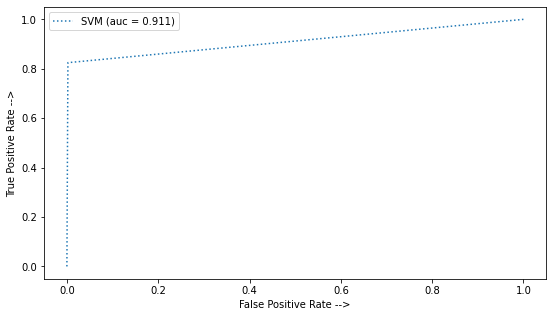

In [40]:
svm_tpr,svm_fpr,threshold=roc_curve(y_test,y_pred_svc)
svm_auc=auc(svm_tpr,svm_fpr)
print('svm_tpr',svm_tpr)
print('svm_fpr',svm_fpr)
print('threshold',threshold)


#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 5))
plt.plot(svm_tpr, svm_fpr, linestyle=':', label='SVM (auc = %0.3f)' % svm_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [41]:
rf=RandomForestClassifier(criterion = 'entropy',random_state=22)
CrossValidateValues_rf = cross_validate(rf,X_train,y_train,cv = 6,return_train_score = True) 

print('train Score Value : ', CrossValidateValues_rf['train_score'])
print('Test Score Value : ', CrossValidateValues_rf['test_score'])

#print('//////////////////////////////////////')

# Showing Results

# Showing Results
score5_train = cross_val_score(estimator =rf, X = X_train, y = y_train, cv = 6)
print("Cross validation is",np.mean(score5_train)*100)


train Score Value :  [1. 1. 1. 1. 1. 1.]
Test Score Value :  [0.9800995  0.96849088 0.97512438 0.97180763 0.96849088 0.97180763]
Cross validation is 97.2636815920398


In [42]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=22)

In [43]:
y_pred_rf=rf.predict(X_test)
print('Y Test: ',y_test[:5,])
print('Y Pred',y_pred_rf[:5,])

Y Test:  2186    0
4217    0
2059    0
2611    0
1812    1
Name: label, dtype: int64
Y Pred [0 0 0 0 0]


In [44]:
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print('Accuracy Score',accuracy_rf)

Accuracy Score 0.9780786589297228


[[1356    1]
 [  33  161]]


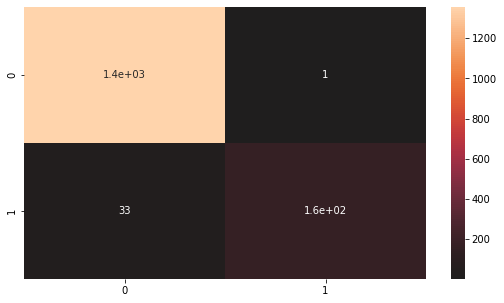

In [45]:
cm=confusion_matrix(y_test,y_pred_rf)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)
plt.show()

In [46]:
cr=classification_report(y_test,y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1357
           1       0.99      0.83      0.90       194

    accuracy                           0.98      1551
   macro avg       0.99      0.91      0.95      1551
weighted avg       0.98      0.98      0.98      1551



rf_tpr Value  :  [0.00000000e+00 7.36919676e-04 1.00000000e+00]
rf_fpr Value  :  [0.         0.82989691 1.        ]
thresholds Value  :  [2 1 0]


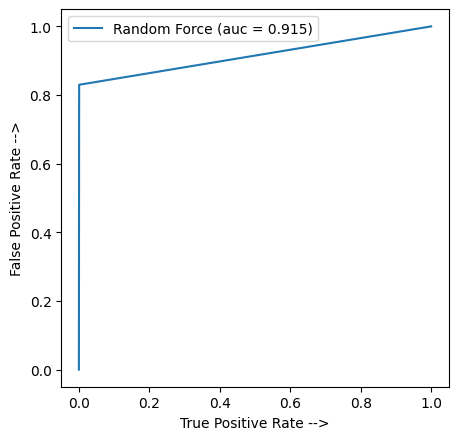

In [47]:
rf_tpr,rf_fpr,threshold=roc_curve(y_test,y_pred_rf)
rf_auc=auc(rf_tpr,rf_fpr)
print('rf_tpr Value  : ', rf_tpr)
print('rf_fpr Value  : ', rf_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_tpr, rf_fpr, linestyle='-', label='Random Force (auc = %0.3f)' % rf_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

In [48]:

NB=BernoulliNB()
CrossValidateValues_nb = cross_validate(NB,X_train,y_train,cv = 5,return_train_score = True) 

print('train Score Value : ', CrossValidateValues_nb['train_score'])
print('Test Score Value : ', CrossValidateValues_nb['test_score'])

#print('//////////////////////////////////////')

# Showing Results

# Showing Results
score6_train = cross_val_score(estimator =NB, X = X_train, y = y_train, cv = 6)
print("Cross validation is",np.mean(score6_train)*100)

train Score Value :  [0.9747754  0.97546648 0.97581202 0.97547496 0.97443869]
Test Score Value :  [0.96961326 0.95856354 0.96823204 0.96542185 0.97095436]
Cross validation is 96.73852957435047


In [49]:
NB.fit(X_train,y_train)

BernoulliNB()

In [50]:
y_pred_NB = NB.predict(X_test)
y_pred_prob = NB.predict_proba(X_test)
y_pred_prob=y_pred_prob.astype(int)
print('Y Test \n' ,y_test[:10,])
print('Predicted Value for BernoulliNBModel is :\n ' , y_pred_NB[:10,])
print('Prediction Probabilities Value for BernoulliNBModel is : \n' , y_pred_prob[:10,:])

Y Test 
 2186    0
4217    0
2059    0
2611    0
1812    1
138     0
429     0
3359    0
1486    1
1827    0
Name: label, dtype: int64
Predicted Value for BernoulliNBModel is :
  [0 0 0 0 0 0 0 0 1 0]
Prediction Probabilities Value for BernoulliNBModel is : 
 [[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [51]:
accuracy_nb=accuracy_score(y_test,y_pred_NB)
print(accuracy_nb)

0.9793681495809156


[[1356    1]
 [  31  163]]


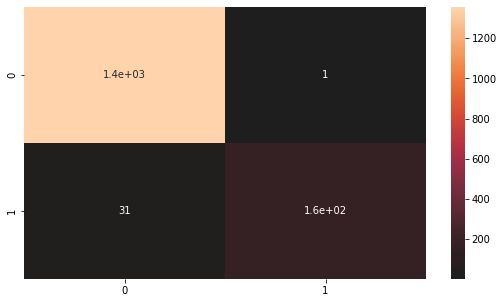

In [52]:
cm = confusion_matrix(y_test,y_pred_NB)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)
plt.show()

In [53]:
cr=classification_report(y_test,y_pred_NB)
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1357
           1       0.99      0.84      0.91       194

    accuracy                           0.98      1551
   macro avg       0.99      0.92      0.95      1551
weighted avg       0.98      0.98      0.98      1551



nb_tpr Value  :  [0.00000000e+00 7.36919676e-04 1.00000000e+00]
nb_fpr Value  :  [0.         0.84020619 1.        ]
thresholds Value  :  [2 1 0]


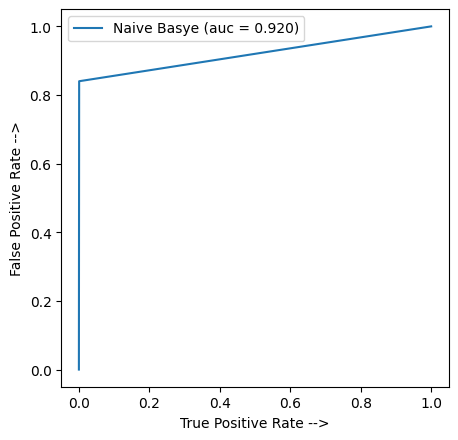

In [54]:
nb_tpr,nb_fpr,threshold=roc_curve(y_test,y_pred_NB)
nb_auc=auc(nb_tpr,nb_fpr)
print('nb_tpr Value  : ', nb_tpr)
print('nb_fpr Value  : ', nb_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(nb_tpr, nb_fpr, linestyle='-', label='Naive Basye (auc = %0.3f)' % nb_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

In [55]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines','Random Forest', 'Naive Bayes'],
    'Score': [accuracy_lg, accuracy_s, accuracy_rf, accuracy_nb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Naive Bayes,0.979368
2,Random Forest,0.978079
1,Support Vector Machines,0.976144
0,Logistic Regression,0.968407
